In [ ]:
import torch
import torch.nn as nn
from data import ImageDataset
from model import ViTVelocity
from torchvision.transforms import v2
from torch.utils.data import DataLoader
from contextlib import nullcontext
from utils import train_loop, sample_rectified_flow

    

data_folder = "../../../cat/"
img_paths = []
import os

for file in os.listdir(data_folder):
    if file.endswith('.png'):
        img_paths.append(os.path.join(data_folder, file))

DS_SIZE = None
NUM_EPOCHS = 500000
SAMPLE_INTERVAL = 10
PRINT_INTERVAL = 20
NOISE_STD = 1
BATCH_SIZE = 64
DEVICE = 'mps'

if DS_SIZE is not None:
    img_paths = img_paths[:DS_SIZE]

transform = v2.Compose([
    v2.ToTensor(),
    v2.Resize((64, 64)),
    v2.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

ds = ImageDataset(img_paths, transform=transform)
dl = DataLoader(ds, batch_size=BATCH_SIZE, shuffle=True)

device = DEVICE


torch.random.manual_seed(69)

#model = ViTVelocity(img_size=64, patch=4, in_ch=3, d_model=128, depth=6).to(device)
#optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.MSELoss()

for epoch in range(NUM_EPOCHS):
    loss = train_loop(
        model,
        dl,
        optimizer,
        loss_fn,
        device=device,
        img_size=64,
        noise_std=NOISE_STD,
        print_every=PRINT_INTERVAL,
    )
    print(f"[epoch {epoch+1}/{NUM_EPOCHS}] loss = {loss:.6f}")

    if (epoch) % SAMPLE_INTERVAL == 0:
        pred = sample_rectified_flow(
            model,
            n=1,
            device=device,
            img_size=64,
            steps=300,
            noise_std=NOISE_STD,
        )

        y = pred.squeeze().permute(1, 2, 0).detach().cpu()
        import matplotlib.pyplot as plt

        plt.figure(figsize=(3, 3))
        plt.imshow(y)
        plt.title(f"epoch {epoch+1}")
        plt.axis('off')
        plt.show()


[step 20] loss = 0.257038
[step 40] loss = 0.271724
[step 60] loss = 0.227516
[step 80] loss = 0.246422


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.755848..4.988613].


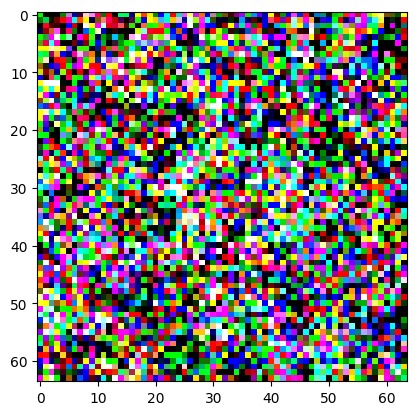

In [ ]:
pred = sample_rectified_flow(model, n=1, device=device, img_size=64, steps=1, noise_std=1)
y = pred.squeeze().permute(1, 2, 0).detach().cpu()
import matplotlib.pyplot as plt
plt.imshow(y)
plt.show()

In [ ]:
len(ds)

1

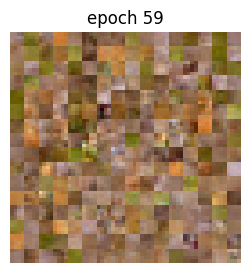

In [12]:
pred = sample_rectified_flow(
    model,
    n=1,
    device=device,
    img_size=64,
    steps=300,
    noise_std=NOISE_STD,
)

y = pred.squeeze().permute(1, 2, 0).detach().cpu()
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.imshow(y)
plt.title(f"epoch {epoch+1}")
plt.axis('off')
plt.show()